In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings # filtering warning
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings 
warnings.filterwarnings('ignore')

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
data=pd.read_csv('Swiggy Bangalore Outlet Details.csv')

In [4]:
data.head()

Shop_Name                                            Cuisine  \
0       Kanti Sweets                                             Sweets   
1      Mumbai Tiffin             North Indian, Home Food, Thalis, Combo   
2  Sri Krishna sagar  South Indian, North Indian, Fast Food, Beverag...   
3            Al Daaz  American, Arabian, Chinese, Desserts, Fast Foo...   
4      Beijing Bites                                      Chinese, Thai   

                   Location Rating Cost_for_Two  
0  Koramangala, Koramangala    4.3        ₹ 150  
1             Sector 5, HSR    4.4        ₹ 400  
2    6th Block, Koramangala    4.1        ₹ 126  
3                  HSR, HSR    4.4        ₹ 400  
4    5th Block, Koramangala    4.1        ₹ 450

In [5]:
data.shape

(118, 5)

In [6]:
data.columns

Index(['Shop_Name', 'Cuisine', 'Location', 'Rating', 'Cost_for_Two'], dtype='object')

In [7]:
data.isnull().sum()

Shop_Name       0
Cuisine         0
Location        0
Rating          0
Cost_for_Two    0
dtype: int64

In [8]:
data.describe(include="all")

Shop_Name       Cuisine  Location Rating Cost_for_Two
count               118           118       118    118          118
unique              115            79        65     13           30
top     La Pino'z Pizza  North Indian  BTM, BTM    4.1        ₹ 300
freq                  2            12        13     30           16

In [9]:
data['Rating'].unique()

array(['4.3', '4.4', '4.1', '4.2', '3.9', '3.8', '4', '3.7', '3.6', '4.8',
       '4.5', '4.6', '--'], dtype=object)

In [10]:
s1="₹ 450"
int(s1.split()[1])

450

In [11]:
s1="₹ 450"
int(s1.strip("₹ "))

450

In [12]:
#Replace '--' rating with zero(0)
data['Rating']=data['Rating'].str.replace('--','0').astype(float)

In [13]:
data['Rating'].unique()

array([4.3, 4.4, 4.1, 4.2, 3.9, 3.8, 4. , 3.7, 3.6, 4.8, 4.5, 4.6, 0. ])

In [14]:
# How many unique entries for 'cost_for _two' feature
data['Cost_for_Two'].unique()

array(['₹ 150', '₹ 400', '₹ 126', '₹ 450', '₹ 350', '₹ 200', '₹ 500',
       '₹ 247', '₹ 550', '₹ 300', '₹ 129', '₹ 250', '₹ 268', '₹ 600',
       '₹ 527', '₹ 130', '₹ 257', '₹ 280', '₹ 399', '₹ 220', '₹ 800',
       '₹ 100', '₹ 178', '₹ 120', '₹ 251', '₹ 650', '₹ 132', '₹ 153',
       '₹ 219', '₹ 193'], dtype=object)

In [15]:
data['Cost_for_Two']=data['Cost_for_Two'].apply(lambda x:int(x.strip("₹ ")))

In [16]:
data['Cost_for_Two'].dtype

dtype('int64')

In [17]:
# Distribution of 'Rating':
data_valid_Ratings=data[data['Rating'] > 0]
data_valid_Ratings

Shop_Name                                            Cuisine  \
0          Kanti Sweets                                             Sweets   
1         Mumbai Tiffin             North Indian, Home Food, Thalis, Combo   
2     Sri Krishna sagar  South Indian, North Indian, Fast Food, Beverag...   
3               Al Daaz  American, Arabian, Chinese, Desserts, Fast Foo...   
4         Beijing Bites                                      Chinese, Thai   
..                  ...                                                ...   
113  Wok Paper Scissors                          Pan-Asian, Chinese, Asian   
114  Savoury Restaurant  Arabian, Middle Eastern, North Indian, Grill, ...   
115         Royal Treat            North Indian, Chinese, Seafood, Biryani   
116            Thali 99                                       North Indian   
117  Mani's Dum Biryani                                    Andhra, Biryani   

                               Location  Rating  Cost_for_Two  
0              Koramangala, Koramangala     4.3           150  
1                         Sector 5, HSR     4.4           400  
2                6th Block, Koramangala     4.1           126  
3                              HSR, HSR     4.4           400  
4                5th Block, Koramangala     4.1           450  
..                                  ...     ...           ...  
113               JNC Road, Koramangala     3.9           219  
114                       Madiwala, BTM     4.1           600  
115  5th block Koramangala, Koramangala     4.2           193  
116            Koramangala, Koramangala     4.3           200  
117              1st Block, Koramangala     4.2           400  

[117 rows x 5 columns]

<Axes: xlabel='Rating', ylabel='Density'>

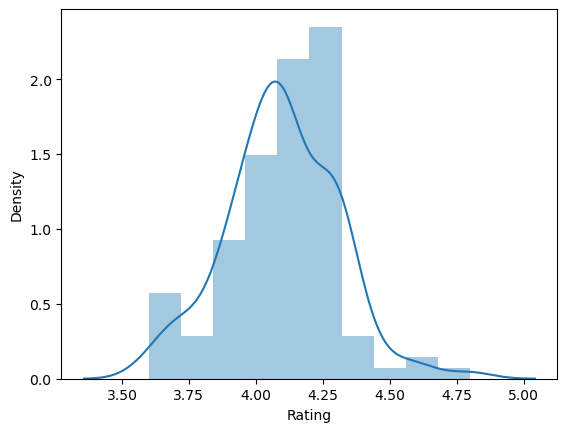

In [18]:
sns.distplot(data_valid_Ratings['Rating'])

In [19]:
data['Location'].unique()

array(['Koramangala, Koramangala', 'Sector 5, HSR',
       '6th Block, Koramangala', 'HSR, HSR', '5th Block, Koramangala',
       'Koramangala 4th  Block, Koramangala', 'BTM 2nd Stage, BTM',
       'BTM, BTM', '9th Main road, Koramangala', 'outer ring road, BTM',
       '7th Block, Koramangala', '1st MAin, Koramangala',
       'Bommanahalli, BTM', '6th block, Koramangala', 'Sector 4, HSR',
       'BTM 1st stage, BTM', 'Jakkasandra Extn, Koramangala',
       'Marutinagar Main Road, BTM', '1st Block, Koramangala',
       '4th Cross, BTM', 'koramangala, Koramangala', 'BTM 2nd stage, BTM',
       '3rd main, BTM', 'HSR 1st sector, HSR', 'Sector 7, HSR',
       '3rd Sector, HSR', 'Chocolate Factory Road, BTM',
       '16th Main Road, 2nd Stage, BTM', '1st Stage, BTM',
       'Hosur Main Road, Koramangala',
       '1st Cross Road, 5th Block, Near Jyothi Nivas College, Koramangala',
       'Mico Layout, BTM', '4th Cross, Koramangala',
       '4th Block, Koramangala', 'Intermediate Ring Road, K

In [20]:
swiggy_Koramangala=data[data['Location'].str.contains(r'Koramangala')]
swiggy_Koramangala

Shop_Name                                            Cuisine  \
0          Kanti Sweets                                             Sweets   
2     Sri Krishna sagar  South Indian, North Indian, Fast Food, Beverag...   
4         Beijing Bites                                      Chinese, Thai   
5    Kitchens of Punjab                                       North Indian   
9         Yumlane Pizza                           Pizzas, Italian, Mexican   
..                  ...                                                ...   
112            Kritunga                                    Andhra, Biryani   
113  Wok Paper Scissors                          Pan-Asian, Chinese, Asian   
115         Royal Treat            North Indian, Chinese, Seafood, Biryani   
116            Thali 99                                       North Indian   
117  Mani's Dum Biryani                                    Andhra, Biryani   

                                Location  Rating  Cost_for_Two  
0               Koramangala, Koramangala     4.3           150  
2                 6th Block, Koramangala     4.1           126  
4                 5th Block, Koramangala     4.1           450  
5    Koramangala 4th  Block, Koramangala     4.2           350  
9             9th Main road, Koramangala     3.8           150  
..                                   ...     ...           ...  
112               5th Block, Koramangala     3.9           500  
113                JNC Road, Koramangala     3.9           219  
115   5th block Koramangala, Koramangala     4.2           193  
116             Koramangala, Koramangala     4.3           200  
117               1st Block, Koramangala     4.2           400  

[64 rows x 5 columns]

In [21]:
swiggy_HSR=data[data['Location'].str.contains(r'HSR')]
swiggy_HSR

Shop_Name  \
1                     Mumbai Tiffin   
3                           Al Daaz   
8                        Hotel Manu   
19              Shree Khana Khazana   
24                  New Udupi Grand   
36                    Biriyani Zone   
37                        Gongura's   
39                       Leon Grill   
41                         Cakewala   
57             Donne Biriyani House   
58                          Nanda's   
61                      Cake Garden   
71                   Nizams Biryani   
73                    Punjabi Rasoi   
98      Mandya Gowdru Donne Biryani   
99   Dindigul Thalapakatti Biriyani   
101                      Easy Bites   
107                 Junior Kuppanna   

                                               Cuisine  \
1               North Indian, Home Food, Thalis, Combo   
3    American, Arabian, Chinese, Desserts, Fast Foo...   
8          South Indian, Kerala, Chinese, North Indian   
19                                  Indian, Rajasthani   
24           Chinese, Jain, North Indian, South Indian   
36                      North Indian, Chinese, Biryani   
37                      North Indian, Chinese, Biryani   
39                       Turkish, Portuguese, American   
41                                            Desserts   
57                                        South Indian   
58                                     Andhra, Biryani   
61                                    Desserts, Bakery   
71                             Biryani, Juices, Kebabs   
73                                        North Indian   
98                                             Biryani   
99                                        North Indian   
101                                   Snacks, American   
107                            Chettinad, South Indian   

                                              Location  Rating  Cost_for_Two  
1                                        Sector 5, HSR     4.4           400  
3                                             HSR, HSR     4.4           400  
8                                             HSR, HSR     4.1           350  
19                                       Sector 4, HSR     4.1           350  
24                                            HSR, HSR     4.3           150  
36                                 HSR 1st sector, HSR     4.1           600  
37                                       Sector 7, HSR     3.8           300  
39                                     3rd Sector, HSR     4.3           300  
41                                            HSR, HSR     4.3           450  
57                                     3rd sector, HSR     4.0           300  
58                                            HSR, HSR     4.0           400  
61                                            HSR, HSR     3.9           250  
71   Venkatapura Main Rd, Teacher's Colony, Jakkasa...     3.6           200  
73                                       Sector 3, HSR     4.0           800  
98                                            HSR, HSR     0.0           350  
99                                            HSR, HSR     4.1           650  
101             9th Main Rd, Sector 6, HSR Layout, HSR     3.8           200  
107                                      Sector 6, HSR     4.0           550

In [22]:
swiggy_BTM=data[data['Location'].str.contains(r'BTM')]
swiggy_BTM

Shop_Name  \
6    99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...   
7                                      La Pino'z Pizza   
10                                  Ambur Star Briyani   
17                                   Sri Lakshmi Dhaba   
20                   Just Bake - Cakes & confectioners   
22                                      Hotel Godavari   
25                                      Swad Punjab da   
27                                       High N Hungry   
31                                   Bengali Fun Foods   
33                                           Oottupura   
35                              Hyderabadi Biryani Hub   
40                                Venu's Donne Biryani   
42                                      Swadista Aahar   
44                              Svadu Pure Ghee Sweets   
45                                       Sai Abhiruchi   
49                                        Balaji's Veg   
51                                 Donne Biryani Mandi   
60                             calicut cafe restaurant   
65                                       World of asia   
66                                       Ghar Ka Khana   
68                                   KANNUR FOOD POINT   
69                                  KANNOOR RESTAURANT   
70                                            Fattoush   
76                           BIRIYANI TASTE MASTH(BTM)   
79                                   Tandoori Merchant   
80                                         Chinese Bae   
83                                     Abhiruchi Hotel   
84                                        Punjabi Swag   
86                             Gyaani Da Punjabi Dhaba   
87                                     Biriyani Bhatti   
92                                      BIRYANI CRAFTS   
104                                     R.B Food Point   
106                                New Tasty Cafeteria   
110                                        Biryani Pot   
114                                 Savoury Restaurant   

                                               Cuisine  \
6                     Fast Food, North Indian, Chinese   
7                                              Italian   
10   Chinese, South Indian, North Indian, Desserts,...   
17                                        North Indian   
20                                    Desserts, Bakery   
22                   North Indian, Chinese, Hyderabadi   
25                                              Indian   
27   Andhra, Biryani, Chinese, Desserts, Fast Food,...   
31                                        North Indian   
33                                Kerala, South Indian   
35                      North Indian, Chinese, Biryani   
40                                             Biryani   
42         South Indian, Snacks, North Indian, Chinese   
44                  Desserts, Fast Food, Sweets, Chaat   
45           Chinese, South Indian, Andhra, Hyderabadi   
49                 North Indian, Chinese, South Indian   
51                       Biryani, Andhra, South Indian   
60                                Fast Food, Beverages   
65                                  Beverages, Chinese   
66                                        North Indian   
68                                     Kerala, Chinese   
69                               North Indian, Chinese   
70   Arabian, Beverages, Biryani, Chinese, Desserts...   
76                          North Indian, South Indian   
79   Andhra, Biryani, Chinese, Desserts, Fast Food,...   
80                                       Chinese, Thai   
83   Chinese, Hyderabadi, Biryani, Indian, South In...   
84   Punjabi, North Indian, Chinese, Fast Food, Hea...   
86                                        North Indian   
87   Biryani, Hyderabadi, Andhra, North Indian, Sou...   
92                                              Indian   
104                              Chinese, North Indian   
106  Andhra, Chettinad, Chinese, Mughlai, 

<Axes: xlabel='Rating', ylabel='Count'>

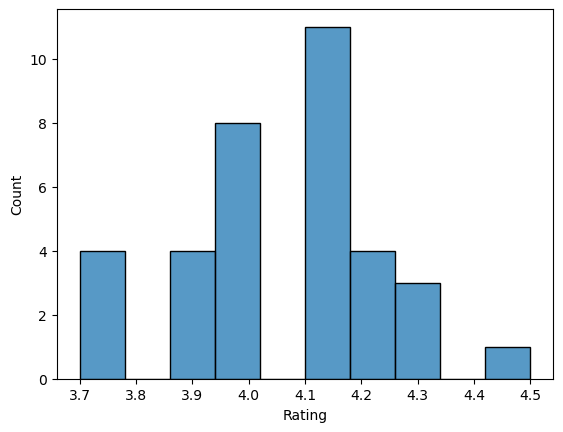

In [23]:
sns.histplot(swiggy_BTM['Rating'],bins=10)

<Axes: xlabel='Cost_for_Two', ylabel='Count'>

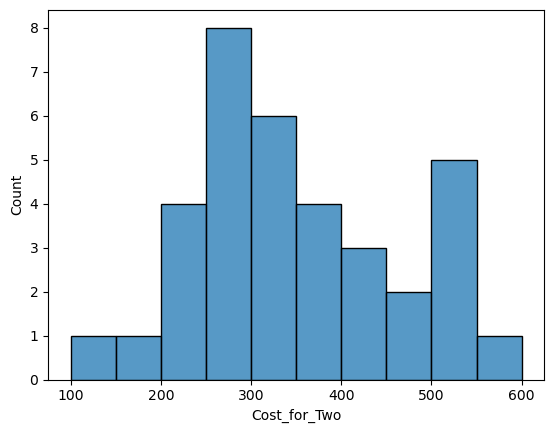

In [24]:
sns.histplot(swiggy_BTM['Cost_for_Two'],bins=10)

BTM: Most has 4.0 to 4.2 Rating and Approx. COst for two people lies between 200 to 350.(Max.Cost goes upto 650)

<Axes: xlabel='Rating', ylabel='Count'>

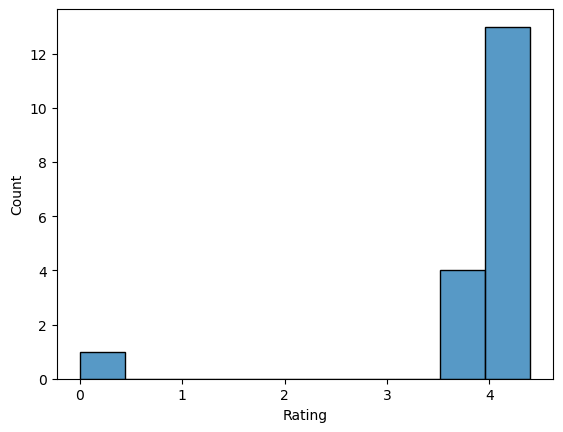

In [26]:
sns.histplot(swiggy_HSR['Rating'],bins=10)

<Axes: xlabel='Rating', ylabel='Count'>

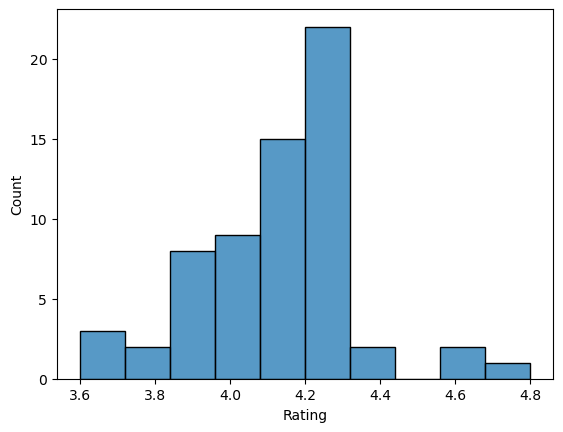

In [27]:
sns.histplot(swiggy_Koramangala['Rating'],bins=10)

<Axes: xlabel='Cost_for_Two', ylabel='Count'>

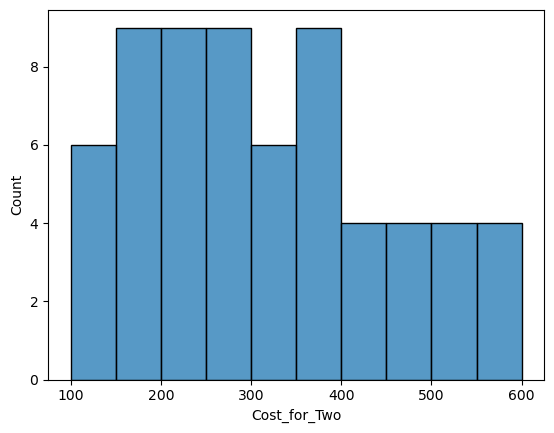

In [28]:
sns.histplot(swiggy_Koramangala['Cost_for_Two'],bins=10)

In [29]:
data_Highest_Rated_Restaurants=data[data["Rating"]>=4.0]
data_Highest_Rated_Restaurants

Shop_Name                                            Cuisine  \
0          Kanti Sweets                                             Sweets   
1         Mumbai Tiffin             North Indian, Home Food, Thalis, Combo   
2     Sri Krishna sagar  South Indian, North Indian, Fast Food, Beverag...   
3               Al Daaz  American, Arabian, Chinese, Desserts, Fast Foo...   
4         Beijing Bites                                      Chinese, Thai   
..                  ...                                                ...   
111             Bowl 99                         North Indian, South Indian   
114  Savoury Restaurant  Arabian, Middle Eastern, North Indian, Grill, ...   
115         Royal Treat            North Indian, Chinese, Seafood, Biryani   
116            Thali 99                                       North Indian   
117  Mani's Dum Biryani                                    Andhra, Biryani   

                               Location  Rating  Cost_for_Two  
0              Koramangala, Koramangala     4.3           150  
1                         Sector 5, HSR     4.4           400  
2                6th Block, Koramangala     4.1           126  
3                              HSR, HSR     4.4           400  
4                5th Block, Koramangala     4.1           450  
..                                  ...     ...           ...  
111             kormangala, Koramangala     4.4           200  
114                       Madiwala, BTM     4.1           600  
115  5th block Koramangala, Koramangala     4.2           193  
116            Koramangala, Koramangala     4.3           200  
117              1st Block, Koramangala     4.2           400  

[92 rows x 5 columns]

In [30]:
data_Highest_Rated_Restaurants=data_Highest_Rated_Restaurants.loc[:,["Shop_Name","Rating","Cost_for_Two"]]
data_Highest_Rated_Restaurants

Shop_Name  Rating  Cost_for_Two
0          Kanti Sweets     4.3           150
1         Mumbai Tiffin     4.4           400
2     Sri Krishna sagar     4.1           126
3               Al Daaz     4.4           400
4         Beijing Bites     4.1           450
..                  ...     ...           ...
111             Bowl 99     4.4           200
114  Savoury Restaurant     4.1           600
115         Royal Treat     4.2           193
116            Thali 99     4.3           200
117  Mani's Dum Biryani     4.2           400

[92 rows x 3 columns]

In [31]:
data_Highest_Rated_Restaurants=data_Highest_Rated_Restaurants.groupby(["Shop_Name","Rating"])["Cost_for_Two"].agg("mean")
data_Highest_Rated_Restaurants=data_Highest_Rated_Restaurants.reset_index()
data_Highest_Rated_Restaurants

Shop_Name  Rating  Cost_for_Two
0     99 VARIETY DOSA AND JUICE-Malli mane food court     4.1         100.0
1   99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...     4.1         200.0
2                           A2B - Adyar Ananda Bhavan     4.2         450.0
3                                     Abhiruchi Hotel     4.0         250.0
4                                             Al Daaz     4.4         400.0
..                                                ...     ...           ...
86                               Venu's Donne Biryani     4.3         300.0
87                           WarmOven Cake & Desserts     4.1         200.0
88                                      World of asia     4.0         250.0
89                                  XO Belgian Waffle     4.3         250.0
90                            calicut cafe restaurant     4.1         280.0

[91 rows x 3 columns]

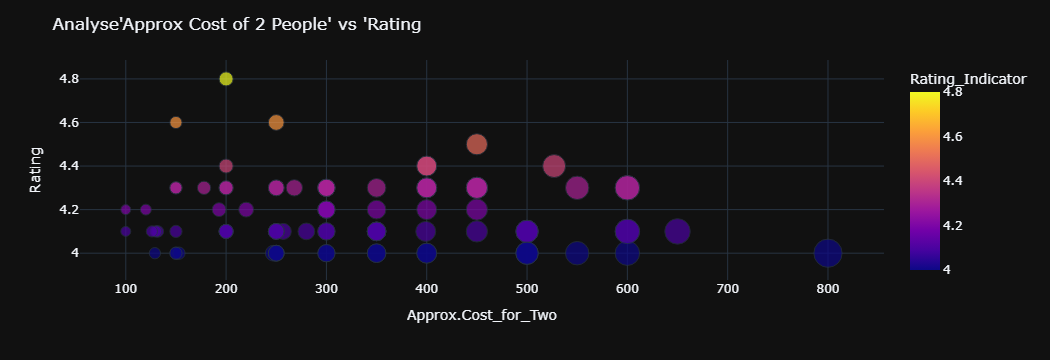

In [32]:
fig=px.scatter(
    x=data_Highest_Rated_Restaurants["Cost_for_Two"],
    y=data_Highest_Rated_Restaurants["Rating"],
    color=data_Highest_Rated_Restaurants["Rating"],
    size=data_Highest_Rated_Restaurants["Cost_for_Two"],
    labels={
        "x":"Approx.Cost_for_Two",
        "y":"Rating",
        "color":"Rating_Indicator",
    },
)
fig.update_layout(
    template="plotly_dark",
    title="Analyse'Approx Cost of 2 People' vs 'Rating",
)
fig.show()

In [33]:
# Analyze Affordable/Budgeted and Highest Rated Restaurants of bangalore:
data_Affordable_Restaurants=data[
    (data["Cost_for_Two"]<=500)&(data["Rating"]>=4.0)
]
data_Affordable_Restaurants

Shop_Name                                            Cuisine  \
0          Kanti Sweets                                             Sweets   
1         Mumbai Tiffin             North Indian, Home Food, Thalis, Combo   
2     Sri Krishna sagar  South Indian, North Indian, Fast Food, Beverag...   
3               Al Daaz  American, Arabian, Chinese, Desserts, Fast Foo...   
4         Beijing Bites                                      Chinese, Thai   
..                  ...                                                ...   
110         Biryani Pot                              North Indian, Biryani   
111             Bowl 99                         North Indian, South Indian   
115         Royal Treat            North Indian, Chinese, Seafood, Biryani   
116            Thali 99                                       North Indian   
117  Mani's Dum Biryani                                    Andhra, Biryani   

                               Location  Rating  Cost_for_Two  
0              Koramangala, Koramangala     4.3           150  
1                         Sector 5, HSR     4.4           400  
2                6th Block, Koramangala     4.1           126  
3                              HSR, HSR     4.4           400  
4                5th Block, Koramangala     4.1           450  
..                                  ...     ...           ...  
110              Madiwala Junction, BTM     4.0           500  
111             kormangala, Koramangala     4.4           200  
115  5th block Koramangala, Koramangala     4.2           193  
116            Koramangala, Koramangala     4.3           200  
117              1st Block, Koramangala     4.2           400  

[82 rows x 5 columns]

In [34]:
data_Affordable_Restaurants=data_Affordable_Restaurants.groupby(
    ["Shop_Name","Rating"]
)["Cost_for_Two"].agg("mean")
data_Affordable_Restaurants=data_Affordable_Restaurants.reset_index()
data_Affordable_Restaurants

Shop_Name  Rating  Cost_for_Two
0     99 VARIETY DOSA AND JUICE-Malli mane food court     4.1         100.0
1   99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...     4.1         200.0
2                           A2B - Adyar Ananda Bhavan     4.2         450.0
3                                     Abhiruchi Hotel     4.0         250.0
4                                             Al Daaz     4.4         400.0
..                                                ...     ...           ...
76                               Venu's Donne Biryani     4.3         300.0
77                           WarmOven Cake & Desserts     4.1         200.0
78                                      World of asia     4.0         250.0
79                                  XO Belgian Waffle     4.3         250.0
80                            calicut cafe restaurant     4.1         280.0

[81 rows x 3 columns]

In [35]:
data_Affordable_Restaurants.groupby(["Shop_Name","Rating"])["Cost_for_Two"].agg("mean").reset_index()

Shop_Name  Rating  Cost_for_Two
0     99 VARIETY DOSA AND JUICE-Malli mane food court     4.1         100.0
1   99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...     4.1         200.0
2                           A2B - Adyar Ananda Bhavan     4.2         450.0
3                                     Abhiruchi Hotel     4.0         250.0
4                                             Al Daaz     4.4         400.0
..                                                ...     ...           ...
76                               Venu's Donne Biryani     4.3         300.0
77                           WarmOven Cake & Desserts     4.1         200.0
78                                      World of asia     4.0         250.0
79                                  XO Belgian Waffle     4.3         250.0
80                            calicut cafe restaurant     4.1         280.0

[81 rows x 3 columns]

In [36]:
data_Affordable_Restaurants.sort_values(by=['Rating'],ascending=False,inplace=True)
data_Affordable_Restaurants

Shop_Name  Rating  Cost_for_Two
41       Khichdi Experiment     4.8         200.0
54        Natural Ice Cream     4.6         150.0
21   Corner House Ice Cream     4.6         250.0
20              Chinese Bae     4.5         450.0
50            Mumbai Tiffin     4.4         400.0
..                      ...     ...           ...
55      New Tasty Cafeteria     4.0         350.0
53          Nandhana Palace     4.0         500.0
52                  Nanda's     4.0         400.0
45             Maa Di Hatti     4.0         129.0
29  Gyaani Da Punjabi Dhaba     4.0         500.0

[81 rows x 3 columns]

<Axes: xlabel='Shop_Name', ylabel='Cost_for_Two'>

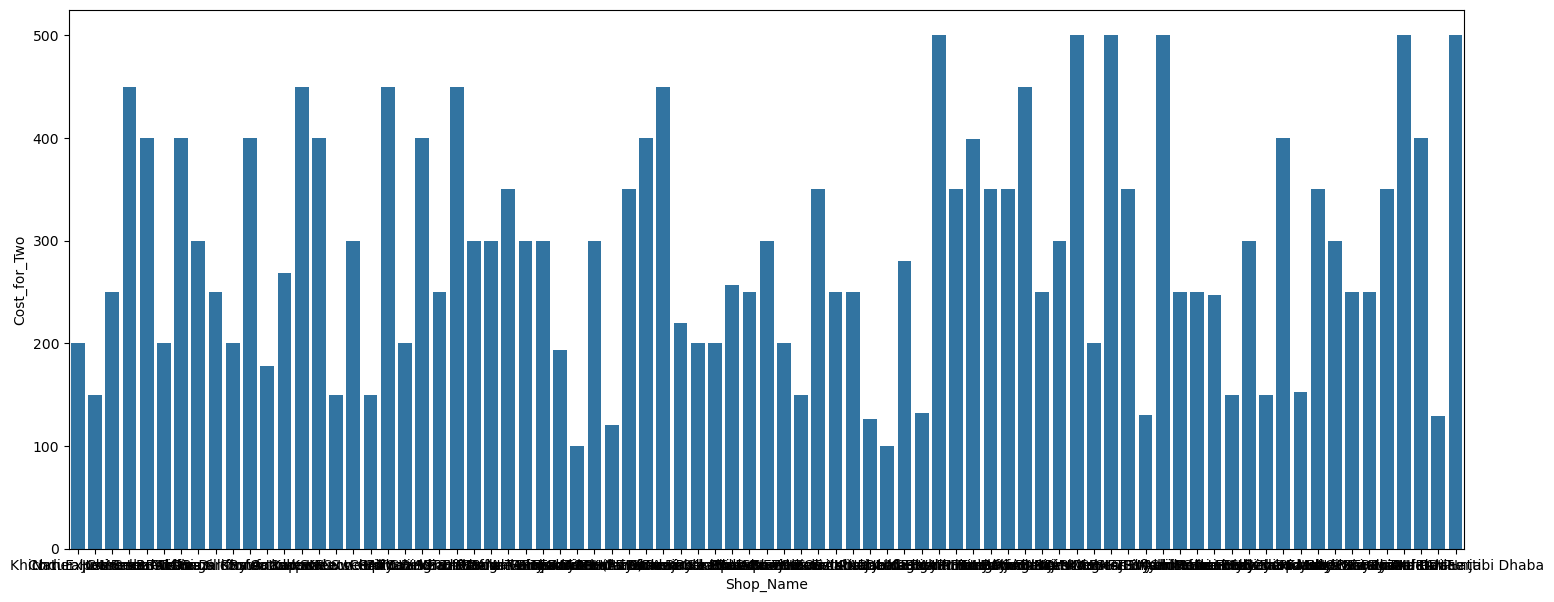

In [37]:
plt.figure(figsize=(18,7))
sns.barplot(
    x=data_Affordable_Restaurants['Shop_Name'],
    y=data_Affordable_Restaurants['Cost_for_Two'],
    data=data_Affordable_Restaurants,
)

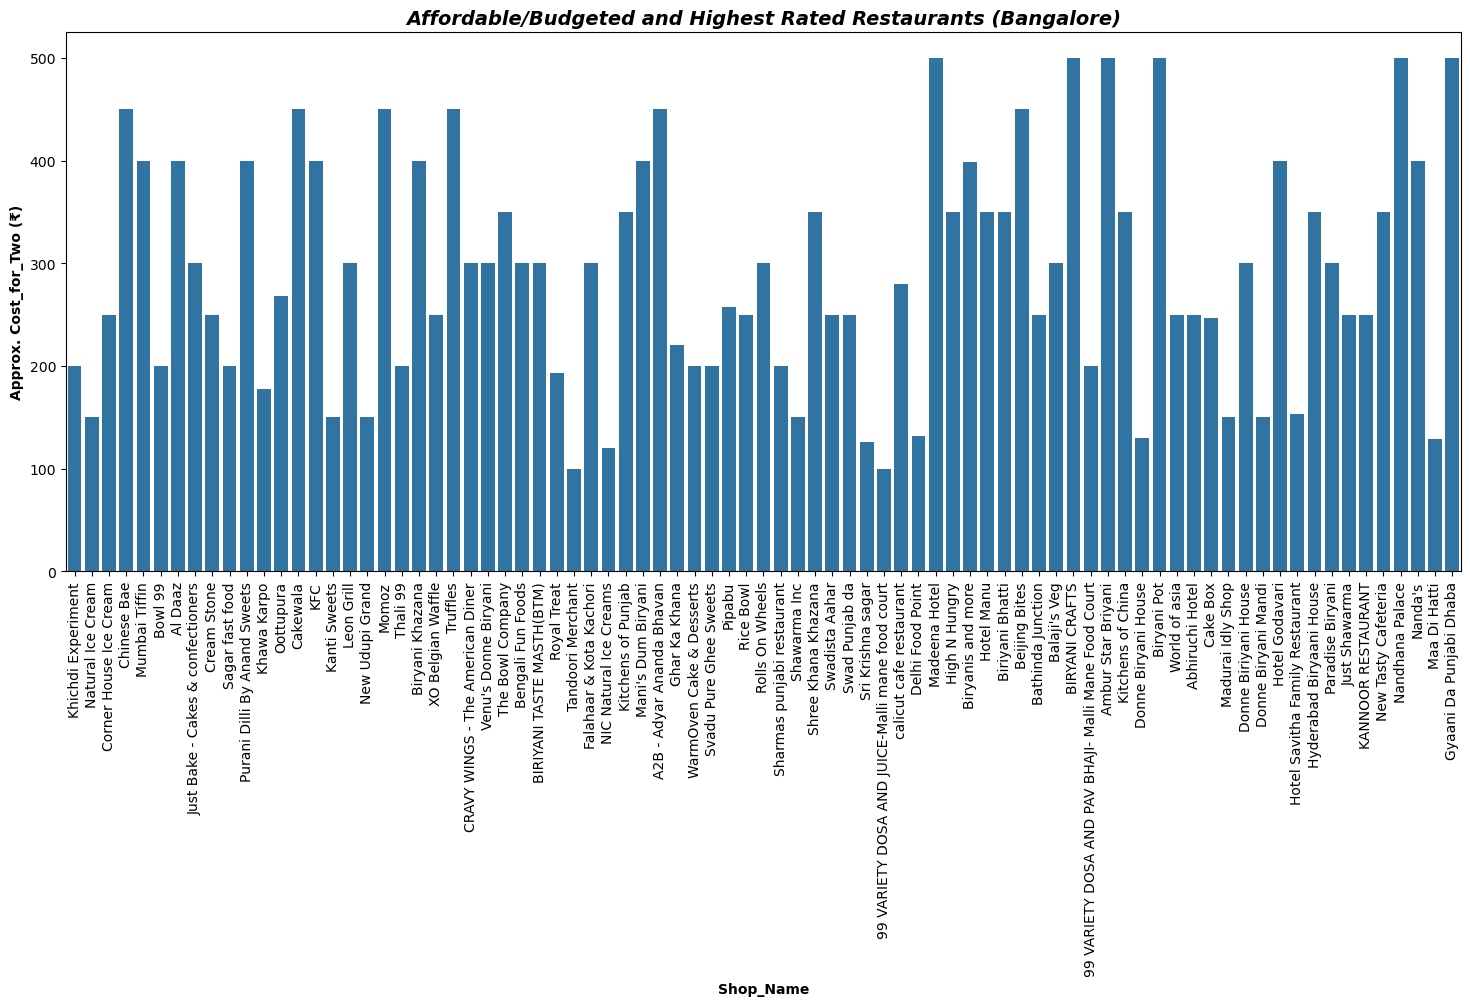

In [38]:
plt.figure(figsize=(18,7))
sns.barplot(
    x=data_Affordable_Restaurants['Shop_Name'],
    y=data_Affordable_Restaurants['Cost_for_Two'],
    data=data_Affordable_Restaurants,
)
plt.title(
    "Affordable/Budgeted and Highest Rated Restaurants (Bangalore)",
    fontsize=14,
    fontweight="bold",
    fontstyle="italic",
)
plt.xlabel("Shop_Name", fontsize=10, fontweight="bold")
plt.ylabel("Approx. Cost_for_Two (₹)", fontsize=10, fontweight="bold")
plt.xticks(rotation=90)
#plt.savefig('img/highest_rated_and_affordable_restaurants.png')
plt.show()

In [48]:
# Q, Top 15 Cheapest & Highest Rated Restaurants with Approx, Cost for 2 People 
data_Cheapest_Restaurants=data_Affordable_Restaurants.sort_values(
    by="Cost_for_Two",ascending=True
)
data_Cheapest_Restaurants

Shop_Name  Rating  Cost_for_Two
72                                Tandoori Merchant     4.2         100.0
0   99 VARIETY DOSA AND JUICE-Malli mane food court     4.1         100.0
51                           NIC Natural Ice Creams     4.2         120.0
68                                Sri Krishna sagar     4.1         126.0
45                                     Maa Di Hatti     4.0         129.0
..                                              ...     ...           ...
5                                Ambur Star Briyani     4.1         500.0
7                                    BIRYANI CRAFTS     4.1         500.0
53                                  Nandhana Palace     4.0         500.0
46                                    Madeena Hotel     4.1         500.0
29                          Gyaani Da Punjabi Dhaba     4.0         500.0

[81 rows x 3 columns]

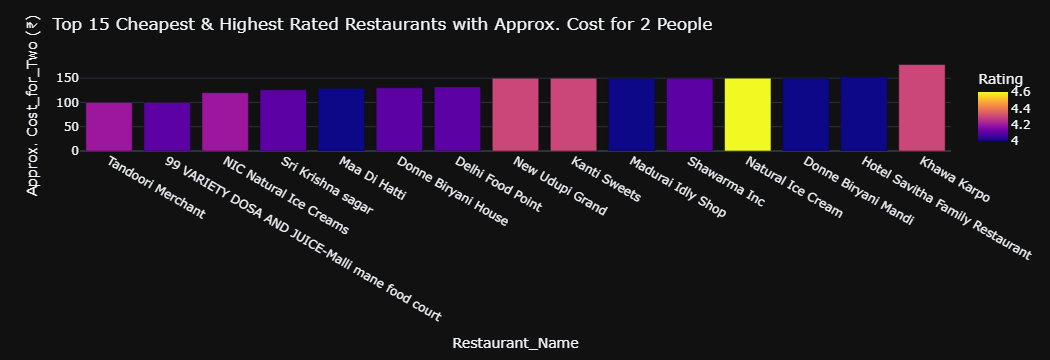

In [50]:
fig = px.bar(
    data_frame=data_Cheapest_Restaurants,
    x=data_Cheapest_Restaurants["Shop_Name"][0:15],
    y=data_Cheapest_Restaurants["Cost_for_Two"][0:15],
    color=data_Cheapest_Restaurants["Rating"][0:15],
    labels={
        "x": "Restaurant_Name",
        "y": "Approx. Cost_for_Two (₹)",
        "color": "Rating",
    },
)
fig.update_layout(
    template="plotly_dark",
    title="Top 15 Cheapest & Highest Rated Restaurants with Approx. Cost for 2 People",
)
#plt.savefig('img/Top15_Cheapest_but_highest_rated_Restaurants.png')
fig.show()

In [52]:
# Q, Top 15 Expensive & Highest Rated Restaurants with Approx, Cost for 2 People 
data_Expensive_Restaurants=data_Highest_Rated_Restaurants.sort_values(
    by="Cost_for_Two",ascending=False)
data_Expensive_Restaurants

Shop_Name  Rating  Cost_for_Two
67                                    Punjabi Rasoi     4.0         800.0
26                   Dindigul Thalapakatti Biriyani     4.1         650.0
73                               Savoury Restaurant     4.1         600.0
81                                        Taco Bell     4.3         600.0
66                                        Pizza Hut     4.0         600.0
..                                              ...     ...           ...
49                                     Maa Di Hatti     4.0         129.0
77                                Sri Krishna sagar     4.1         126.0
56                           NIC Natural Ice Creams     4.2         120.0
82                                Tandoori Merchant     4.2         100.0
0   99 VARIETY DOSA AND JUICE-Malli mane food court     4.1         100.0

[91 rows x 3 columns]

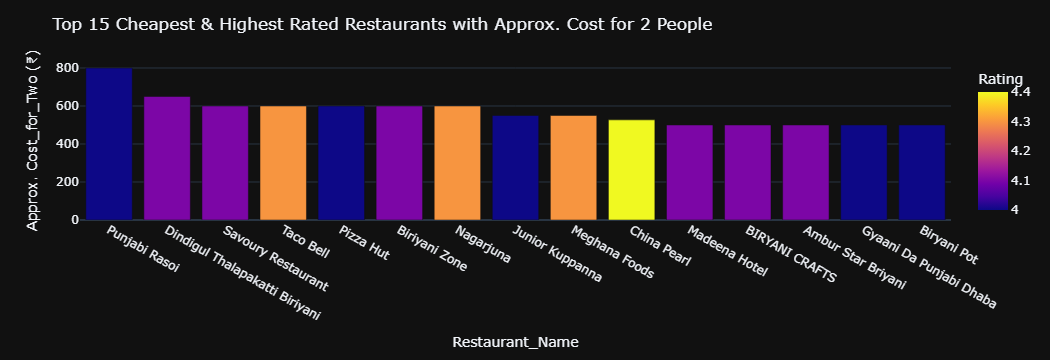

In [54]:
fig = px.bar(
    data_frame=data_Expensive_Restaurants,
    x=data_Expensive_Restaurants["Shop_Name"][0:15],
    y=data_Expensive_Restaurants["Cost_for_Two"][0:15],
    color=data_Expensive_Restaurants["Rating"][0:15],
    labels={
        "x": "Restaurant_Name",
        "y": "Approx. Cost_for_Two (₹)",
        "color": "Rating",
    },
)
fig.update_layout(
    template="plotly_dark",
    title="Top 15 Cheapest & Highest Rated Restaurants with Approx. Cost for 2 People",
)
#plt.savefig('img/Top15_Cheapest_but_highest_rated_Restaurants.png')
fig.show()

# Cuisine Analysis

In [56]:
data['Cuisine']=data['Cuisine'].str.title()
data['Cuisine']

0                                                 Sweets
1                 North Indian, Home Food, Thalis, Combo
2      South Indian, North Indian, Fast Food, Beverag...
3      American, Arabian, Chinese, Desserts, Fast Foo...
4                                          Chinese, Thai
                             ...                        
113                            Pan-Asian, Chinese, Asian
114    Arabian, Middle Eastern, North Indian, Grill, ...
115              North Indian, Chinese, Seafood, Biryani
116                                         North Indian
117                                      Andhra, Biryani
Name: Cuisine, Length: 118, dtype: object

In [58]:
data['Cuisine'].unique()

array(['Sweets', 'North Indian, Home Food, Thalis, Combo',
       'South Indian, North Indian, Fast Food, Beverages, Jain',
       'American, Arabian, Chinese, Desserts, Fast Food, Mughlai, North Indian',
       'Chinese, Thai', 'North Indian',
       'Fast Food, North Indian, Chinese', 'Italian',
       'South Indian, Kerala, Chinese, North Indian',
       'Pizzas, Italian, Mexican',
       'Chinese, South Indian, North Indian, Desserts, Fast Food, Kerala, Andhra, Beverages, Mughlai, Seafood',
       'Desserts', 'Chinese, Andhra, Biryani, Seafood', 'Chinese',
       'South Indian, Chinese, Desserts, North Indian',
       'Arabian, Fast Food', 'Desserts, Beverages', 'Indian, Rajasthani',
       'Desserts, Bakery', 'Chinese, Healthy Food, North Indian',
       'North Indian, Chinese, Hyderabadi', 'Fast Food',
       'Chinese, Jain, North Indian, South Indian', 'Indian',
       'North Indian, South Indian, Chinese',
       'Andhra, Biryani, Chinese, Desserts, Fast Food, Seafood, South In

In [60]:
from collections import Counter

frequency_list=[]

for i in data['Cuisine'].unique():
    frequency_list.append(Counter(i.split(",")))
print(frequency_list)

[Counter({'Sweets': 1}), Counter({'North Indian': 1, ' Home Food': 1, ' Thalis': 1, ' Combo': 1}), Counter({'South Indian': 1, ' North Indian': 1, ' Fast Food': 1, ' Beverages': 1, ' Jain': 1}), Counter({'American': 1, ' Arabian': 1, ' Chinese': 1, ' Desserts': 1, ' Fast Food': 1, ' Mughlai': 1, ' North Indian': 1}), Counter({'Chinese': 1, ' Thai': 1}), Counter({'North Indian': 1}), Counter({'Fast Food': 1, ' North Indian': 1, ' Chinese': 1}), Counter({'Italian': 1}), Counter({'South Indian': 1, ' Kerala': 1, ' Chinese': 1, ' North Indian': 1}), Counter({'Pizzas': 1, ' Italian': 1, ' Mexican': 1}), Counter({'Chinese': 1, ' South Indian': 1, ' North Indian': 1, ' Desserts': 1, ' Fast Food': 1, ' Kerala': 1, ' Andhra': 1, ' Beverages': 1, ' Mughlai': 1, ' Seafood': 1}), Counter({'Desserts': 1}), Counter({'Chinese': 1, ' Andhra': 1, ' Biryani': 1, ' Seafood': 1}), Counter({'Chinese': 1}), Counter({'South Indian': 1, ' Chinese': 1, ' Desserts': 1, ' North Indian': 1}), Counter({'Arabian': 

In [62]:
freq_dict={}
for i in data['Cuisine'].unique():
    Cuisines_Lists=i.split(",")
    for Cuisine in Cuisines_Lists:
        Cuisine =Cuisine.lstrip(" ")
        if Cuisine in freq_dict:
            freq_dict[Cuisine]=freq_dict[Cuisine]+1
        else:
            freq_dict[Cuisine]=1
print(freq_dict)
print()
print("Total records:\t",len(freq_dict))

{'Sweets': 2, 'North Indian': 32, 'Home Food': 2, 'Thalis': 1, 'Combo': 1, 'South Indian': 23, 'Fast Food': 16, 'Beverages': 9, 'Jain': 2, 'American': 8, 'Arabian': 4, 'Chinese': 35, 'Desserts': 15, 'Mughlai': 7, 'Thai': 2, 'Italian': 4, 'Kerala': 6, 'Pizzas': 5, 'Mexican': 3, 'Andhra': 12, 'Seafood': 8, 'Biryani': 18, 'Indian': 5, 'Rajasthani': 1, 'Bakery': 2, 'Healthy Food': 4, 'Hyderabadi': 5, 'Snacks': 4, 'Turkish': 2, 'Portuguese': 2, 'Chaat': 2, 'Asian': 3, 'Continental': 3, 'Mediterranean': 1, 'Lebanese': 1, 'Cafe': 2, 'Salads': 2, 'Pastas': 1, 'Punjabi': 2, 'Juices': 2, 'Kebabs': 2, 'Grill': 2, 'Ice Cream': 2, 'Tandoor': 1, 'Chettinad': 2, 'Pan-Asian': 2, 'Oriental': 1, 'Middle Eastern': 1}

Total records:	 48


In [64]:
# Extracting Cuisines name and there frequency 
Cuisine=freq_dict.keys()
freq=freq_dict.values()

data_Cuisine_Analysis=pd.DataFrame()

# Creating a dataframe having two feature --> Cuisine and count
data_Cuisine_Analysis['Cuisine']=Cuisine
data_Cuisine_Analysis['Count']=freq

data_Cuisine_Analysis

Cuisine  Count
0           Sweets      2
1     North Indian     32
2        Home Food      2
3           Thalis      1
4            Combo      1
5     South Indian     23
6        Fast Food     16
7        Beverages      9
8             Jain      2
9         American      8
10         Arabian      4
11         Chinese     35
12        Desserts     15
13         Mughlai      7
14            Thai      2
15         Italian      4
16          Kerala      6
17          Pizzas      5
18         Mexican      3
19          Andhra     12
20         Seafood      8
21         Biryani     18
22          Indian      5
23      Rajasthani      1
24          Bakery      2
25    Healthy Food      4
26      Hyderabadi      5
27          Snacks      4
28         Turkish      2
29      Portuguese      2
30           Chaat      2
31           Asian      3
32     Continental      3
33   Mediterranean      1
34        Lebanese      1
35            Cafe      2
36          Salads      2
37          Pastas      1
38         Punjabi      2
39          Juices      2
40          Kebabs      2
41           Grill      2
42       Ice Cream      2
43         Tandoor      1
44       Chettinad      2
45       Pan-Asian      2
46        Oriental      1
47  Middle Eastern      1

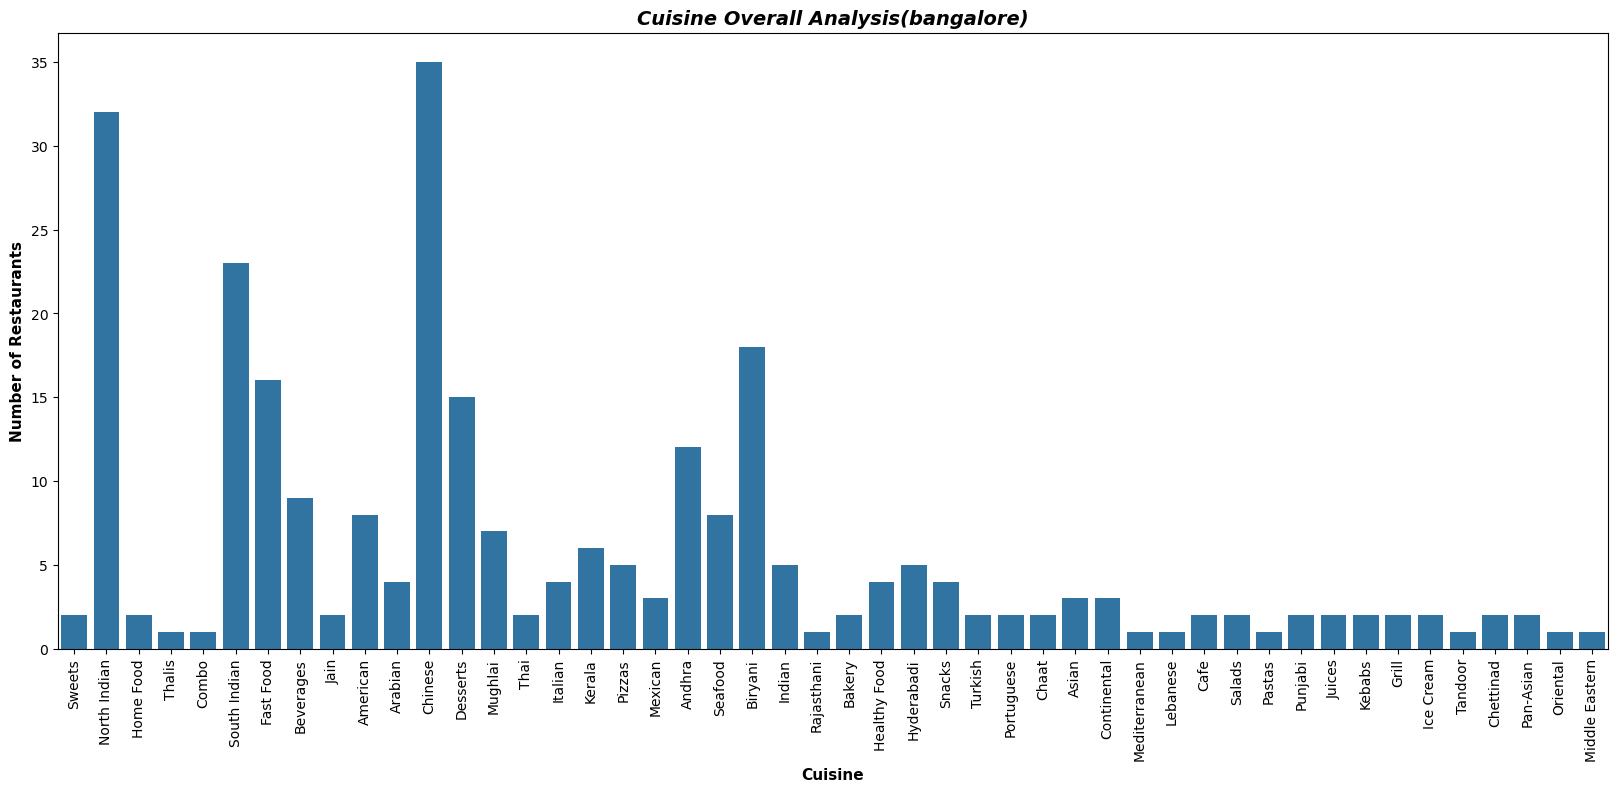

In [66]:
plt.figure(figsize=(20,8))
sns.barplot(
    x=data_Cuisine_Analysis["Cuisine"],
    y=data_Cuisine_Analysis["Count"],
    data=data_Cuisine_Analysis,
)
plt.xticks(rotation=90)
plt.title(
    "Cuisine Overall Analysis(bangalore)",
    fontsize=14,
    fontweight="bold",
    fontstyle="italic",
)
plt.xlabel("Cuisine", fontsize=11, fontweight="bold")
plt.ylabel("Number of Restaurants", fontsize=11, fontweight="bold")
#plt.savefig('img/Overall Analysis of Cuisines.png')
plt.show()


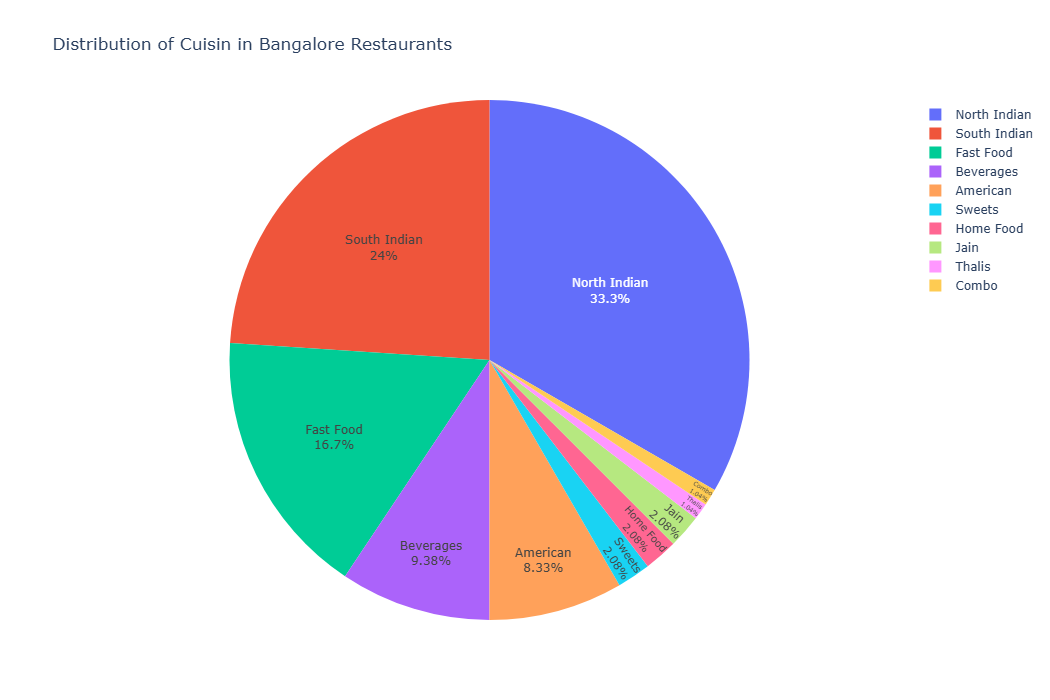

In [68]:
fig=px.pie(
    data_frame=data_Cuisine_Analysis,
    names=data_Cuisine_Analysis['Cuisine'][:10],
    values=data_Cuisine_Analysis['Count'][:10],
    title="Distribution of Cuisin in Bangalore Restaurants",width=700,height=700
)
fig.update_traces(textposition="inside",textinfo="percent+label")
fig.show()

In [70]:
freq_BTM={}
for i in swiggy_BTM['Cuisine'].unique():
    Cuisine_List=i.split(",")
    for Cuisine in Cuisine_List:
        Cuisine =Cuisine.lstrip(" ")
        if Cuisine in freq_BTM:
            freq_BTM[Cuisine]=freq_BTM[Cuisine]+1
        else:
            freq_BTM[Cuisine]=1
print(freq_BTM)
print()
print(len(freq_BTM))

{'Fast Food': 6, 'North Indian': 16, 'Chinese': 18, 'Italian': 1, 'South Indian': 10, 'Desserts': 6, 'Kerala': 4, 'Andhra': 7, 'Beverages': 4, 'Mughlai': 3, 'Seafood': 3, 'Bakery': 1, 'Hyderabadi': 4, 'Indian': 2, 'Biryani': 8, 'Snacks': 1, 'Sweets': 1, 'Chaat': 1, 'Arabian': 2, 'Thai': 1, 'Tandoor': 1, 'Punjabi': 1, 'Healthy Food': 1, 'Chettinad': 1, 'Middle Eastern': 1, 'Grill': 1}

26


In [74]:
# Extracting Cuisines name and there frequency 
cuisine = freq_BTM.keys()
freq = freq_BTM.values()

dict = {'cuisine':cuisine,'count':freq}
data_cuisine_analysis = pd.DataFrame(dict)
data_cuisine_analysis

cuisine  count
0        Fast Food      6
1     North Indian     16
2          Chinese     18
3          Italian      1
4     South Indian     10
5         Desserts      6
6           Kerala      4
7           Andhra      7
8        Beverages      4
9          Mughlai      3
10         Seafood      3
11          Bakery      1
12      Hyderabadi      4
13          Indian      2
14         Biryani      8
15          Snacks      1
16          Sweets      1
17           Chaat      1
18         Arabian      2
19            Thai      1
20         Tandoor      1
21         Punjabi      1
22    Healthy Food      1
23       Chettinad      1
24  Middle Eastern      1
25           Grill      1